In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [257]:
heart_data=pd.read_csv('heart.csv')
heart_data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Data Information
- No Null Values

In [258]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Data Description

In [259]:
heart_data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Checking For Outliers

- Age

In [260]:
heart_data[heart_data.Age>3*heart_data.Age.std()*heart_data.Age.mean()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


- Cholesterol

In [261]:
heart_data[heart_data.Cholesterol>3*heart_data.Cholesterol.std()*heart_data.Cholesterol.mean()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


- Resting BP(Blood Pressure)

In [262]:
heart_data[heart_data.RestingBP>3*heart_data.RestingBP.std()*heart_data.RestingBP.mean()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


- Max HR(Heart Rate)

In [263]:
heart_data[heart_data.MaxHR>3*heart_data.MaxHR.std()*heart_data.MaxHR.mean()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


- We Infer that data do not have outliers

In [264]:
X=heart_data.drop(columns="HeartDisease")
Y=heart_data[["HeartDisease"]]

# Labelling Categorical Data

- Categorical Data is: 

In [265]:
cat_column=X.select_dtypes("object").columns
cat_column

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [266]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
X.Sex=lbl.fit_transform(X.Sex)
X.ChestPainType=lbl.fit_transform(X.ChestPainType)
X.RestingECG=lbl.fit_transform(X.RestingECG)
X.ExerciseAngina=lbl.fit_transform(X.ExerciseAngina)
X.ST_Slope=lbl.fit_transform(X.ST_Slope)
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


# Visualizing Data

# Sex Vs HeartDisease

- 0 is No HeartDisease
- 1 is HeartDisease

<AxesSubplot:title={'center':'Female'}, xlabel='HeartDisease', ylabel='count'>

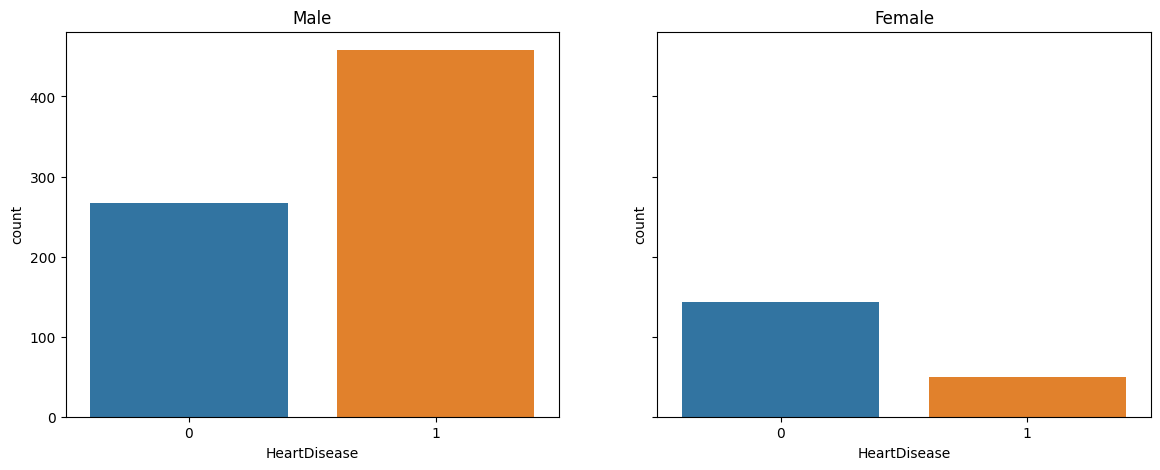

In [267]:
import seaborn as sns
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5),sharey=True)
ax1.set_title('Male')
sns.countplot(heart_data[heart_data['Sex']=="M"]['HeartDisease'],ax=ax1)
ax2.set_title('Female')
sns.countplot(heart_data[heart_data['Sex']=="F"]['HeartDisease'],ax=ax2)

# Age Vs HeartDisease

<AxesSubplot:title={'center':'Heart Disease'}, xlabel='Age', ylabel='Count'>

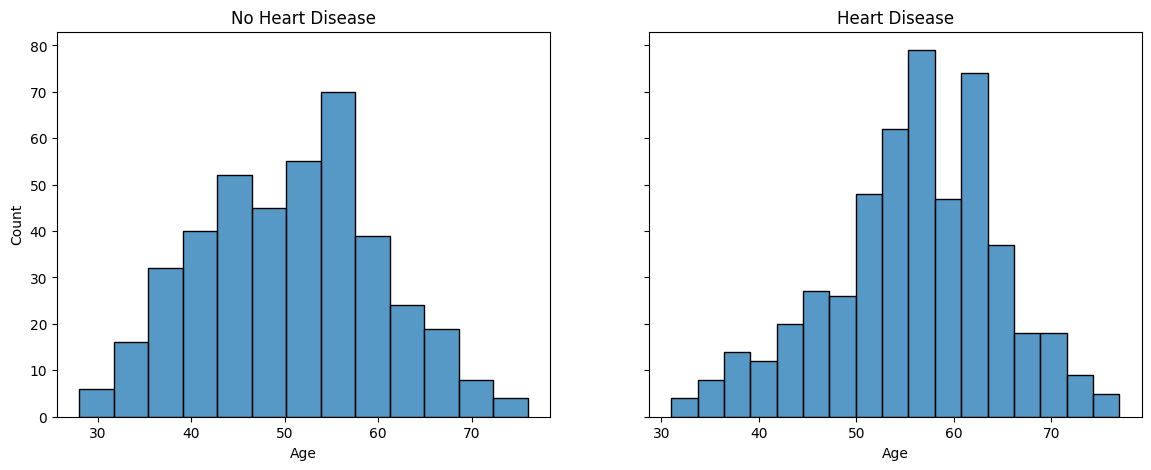

In [268]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5),sharey=True)
ax1.set_title('No Heart Disease')
sns.histplot(heart_data[heart_data['HeartDisease']==0]['Age'],ax=ax1)
ax2.set_title('Heart Disease')
sns.histplot(heart_data[heart_data['HeartDisease']==1]['Age'],ax=ax2)

# Chest Pain Type Vs HeartDisease

<AxesSubplot:title={'center':'TA'}, xlabel='HeartDisease', ylabel='count'>

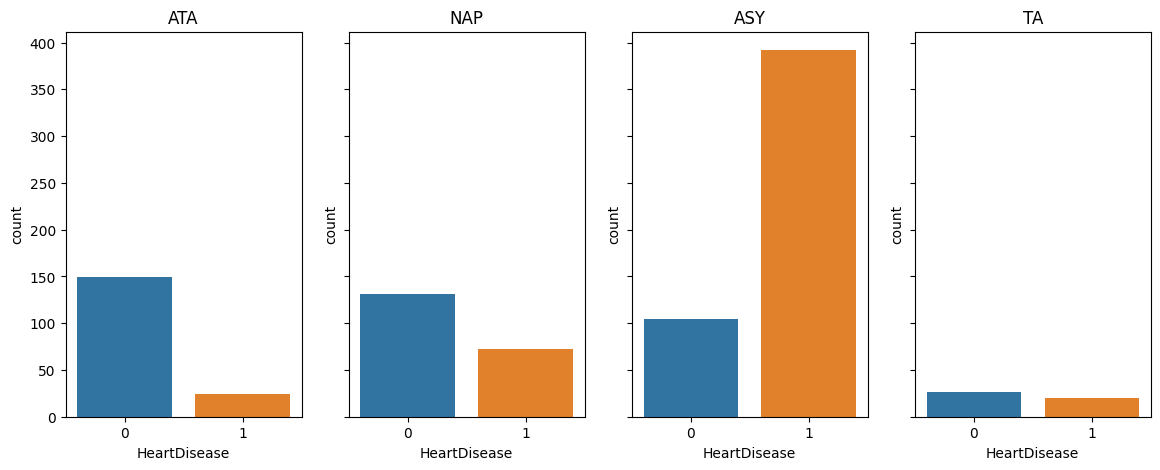

In [269]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(14,5),sharey=True)
ax1.set_title('ATA')
sns.countplot(heart_data[heart_data.ChestPainType=="ATA"]['HeartDisease'],ax=ax1)
ax2.set_title('NAP')
sns.countplot(heart_data[heart_data.ChestPainType=="NAP"]['HeartDisease'],ax=ax2)
ax3.set_title('ASY')
sns.countplot(heart_data[heart_data.ChestPainType=="ASY"]['HeartDisease'],ax=ax3)
ax4.set_title('TA')
sns.countplot(heart_data[heart_data.ChestPainType=="TA"]['HeartDisease'],ax=ax4)

# RestingBP vs HeartDisease

<AxesSubplot:title={'center':'Heart Disease'}, xlabel='RestingBP', ylabel='Count'>

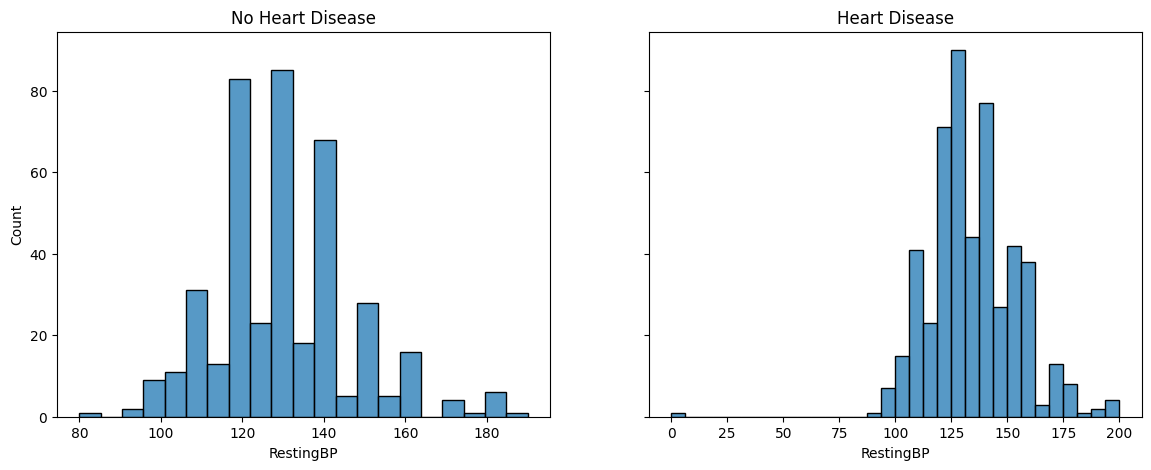

In [270]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5),sharey=True)
ax1.set_title('No Heart Disease')
sns.histplot(heart_data[heart_data['HeartDisease']==0]['RestingBP'],ax=ax1)
ax2.set_title('Heart Disease')
sns.histplot(heart_data[heart_data['HeartDisease']==1]['RestingBP'],ax=ax2)

# Cholesterol vs HeartDisease

<AxesSubplot:title={'center':'Heart Disease'}, xlabel='Cholesterol', ylabel='Count'>

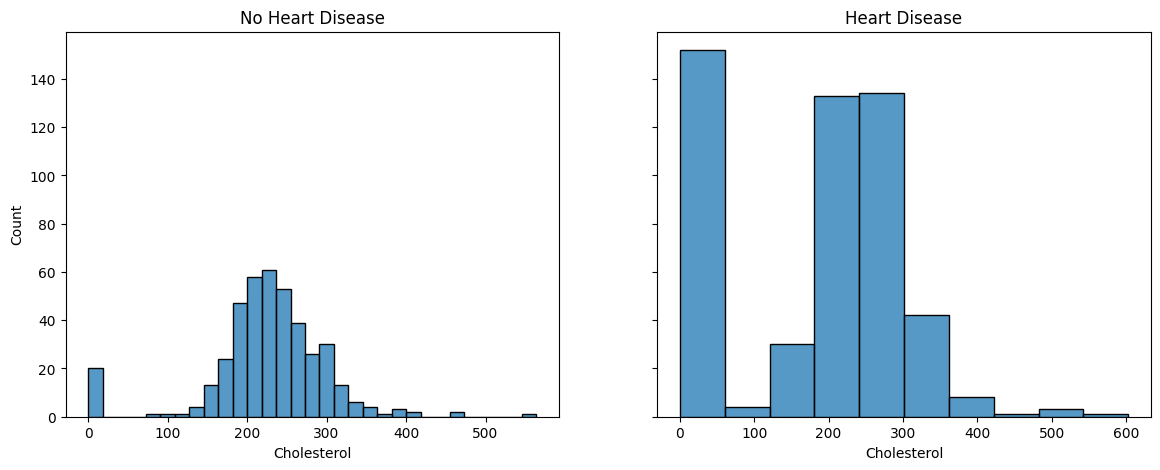

In [271]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5),sharey=True)
ax1.set_title('No Heart Disease')
sns.histplot(heart_data[heart_data['HeartDisease']==0]['Cholesterol'],ax=ax1)
ax2.set_title('Heart Disease')
sns.histplot(heart_data[heart_data['HeartDisease']==1]['Cholesterol'],ax=ax2)

# MaxHR vs HeartDisease

<AxesSubplot:title={'center':'Heart Disease'}, xlabel='MaxHR', ylabel='Count'>

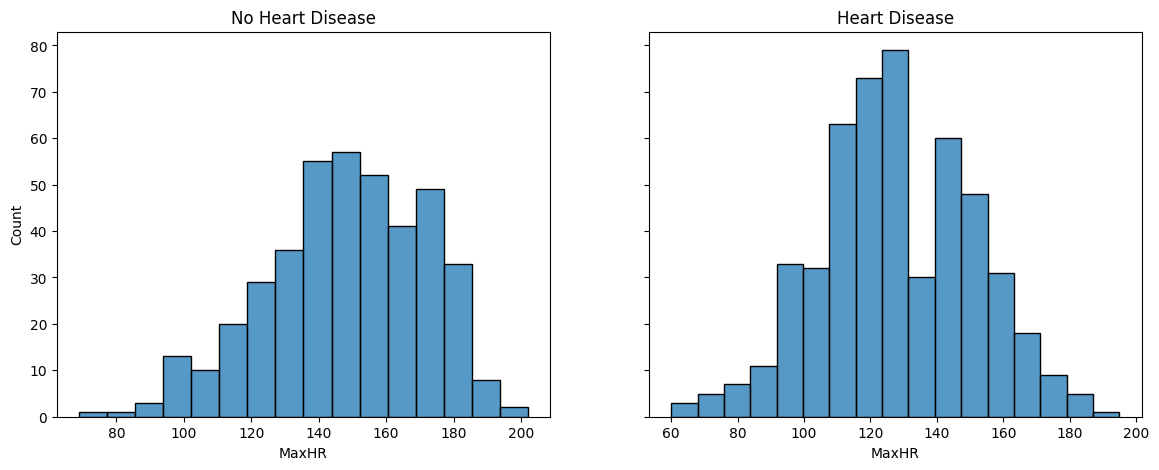

In [272]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,5),sharey=True)
ax1.set_title('No Heart Disease')
sns.histplot(heart_data[heart_data['HeartDisease']==0]['MaxHR'],ax=ax1)
ax2.set_title('Heart Disease')
sns.histplot(heart_data[heart_data['HeartDisease']==1]['MaxHR'],ax=ax2)

<AxesSubplot:>

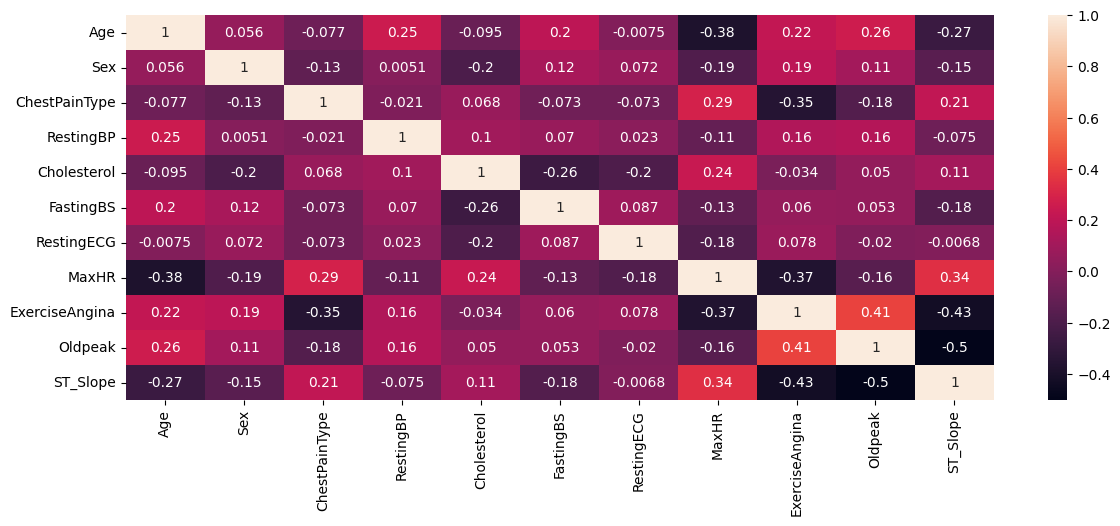

In [273]:
plt.figure(figsize=(14,5))
sns.heatmap(X.corr(),annot=True)

# Using Random Forest Classifier

# Scalling Data

In [274]:
from sklearn.preprocessing import StandardScaler
num_col=X.columns.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
num_col=num_col.drop('Oldpeak')
sc=StandardScaler()
X[num_col]=sc.fit_transform(X[num_col])
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,1,1,0.410909,0.825070,-0.551341,1,1.382928,0,0.0,2
1,-0.478484,0,2,1.491752,-0.171961,-0.551341,1,0.754157,0,1.0,1
2,-1.751359,1,1,-0.129513,0.770188,-0.551341,2,-1.525138,0,0.0,2
3,-0.584556,0,0,0.302825,0.139040,-0.551341,1,-1.132156,1,1.5,1
4,0.051881,1,2,0.951331,-0.034755,-0.551341,1,-0.581981,0,0.0,2


# Selecting Paramters For Random Forest

In [275]:
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.ensemble import RandomForestClassifier
clf=GridSearchCV(RandomForestClassifier(),{
    'n_estimators':list(range(1,100,5))
},cv=5,return_train_score=False)
clf.fit(X,Y)
pd.DataFrame(clf.cv_results_)[['param_n_estimators','mean_test_score']]

,param_n_estimators,mean_test_score
0,1,0.754811
1,6,0.802762
2,11,0.817997
3,16,0.821323
4,21,0.819078
5,26,0.819114
6,31,0.814730
7,36,0.826734
8,41,0.827821
9,46,0.825647


In [276]:
clf.best_params_

{'n_estimators': 86}

In [277]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=11)

In [278]:
model=RandomForestClassifier(n_estimators=clf.best_params_['n_estimators'])
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=86)

# Checking For Overfitting

In [279]:
from sklearn.metrics import confusion_matrix,accuracy_score
print("Training Accuracy: ",accuracy_score(y_train,model.predict(X_train)))
print("Testing Accuracy: ",accuracy_score(y_test,model.predict(X_test)))

Training Accuracy:  1.0
Testing Accuracy:  0.8097826086956522


# Confusion Matrix

Text(95.72222222222221, 0.5, 'True')

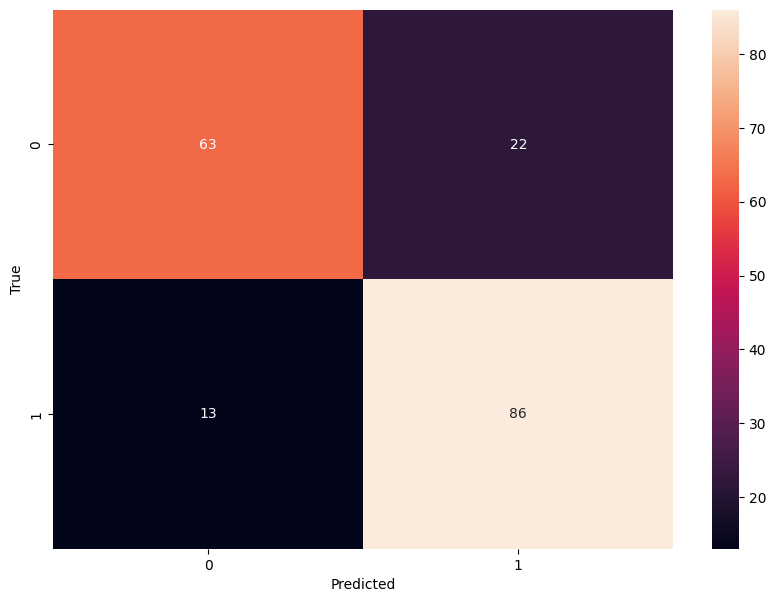

In [280]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,model.predict(X_test)),annot=True)
plt.xlabel("Predicted",fontdict=({"size":10}))
plt.ylabel("True",fontdict=({"size":10}))